# Preprocessing Data, Prediction and Cross Validation

In [1]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Read data frame from csv
df = pd.read_csv("C:/Users/koush/HSE/ProjectBigData/StudentsPerformance.csv")

In [3]:
#Combined all scores
df["combined_score"] = df[["math score","reading score","writing score"]].mean(axis=1).astype('int')

In [4]:
#Rename Columns
df.rename(columns = {"parental level of education":"parent_ed", "race/ethnicity":"race",
                    "test preparation course":"prep", "math score":"math_score", "reading score":"reading_score","writing score":"writing_score"}, inplace=True)

In [5]:
df.head(10)

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,91
7,male,group B,some college,free/reduced,none,40,43,39,40
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


In [6]:
#Change "some high school" to "high school"
df["parent_ed"] = df["parent_ed"].replace(["some high school"], "high school")

In [7]:
df.head(10)

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,91
7,male,group B,some college,free/reduced,none,40,43,39,40
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


In [8]:
#Change "some college" to "college"
df["parent_ed"] = df["parent_ed"].replace(["some college"], "college")

In [9]:
df.head(10)

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,college,standard,completed,88,95,92,91
7,male,group B,college,free/reduced,none,40,43,39,40
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


<AxesSubplot:xlabel='parent_ed', ylabel='combined_score'>

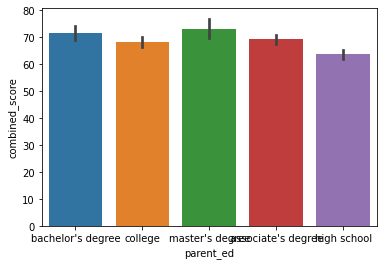

In [10]:
#bar chart according to different level of education vs Combined score
sns.barplot(x = "parent_ed", y = "combined_score", data=df)

In [11]:
# Preprocessing Diferent level of education
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [["high school","college", "associate's degree", "bachelor's degree", "master's degree"]])
df.parent_ed = ord_enc.fit_transform(df.loc[:, ["parent_ed"]])
df.head()

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,female,group B,3.0,standard,none,72,72,74,72
1,female,group C,1.0,standard,completed,69,90,88,82
2,female,group B,4.0,standard,none,90,95,93,92
3,male,group A,2.0,free/reduced,none,47,57,44,49
4,male,group C,1.0,standard,none,76,78,75,76


In [12]:
# Preprocessing lunch column
ord_enc_1 = OrdinalEncoder(categories = [["free/reduced","standard"]])
df.lunch = ord_enc_1.fit_transform(df.loc[:, ["lunch"]])
df.head()

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,female,group B,3.0,1.0,none,72,72,74,72
1,female,group C,1.0,1.0,completed,69,90,88,82
2,female,group B,4.0,1.0,none,90,95,93,92
3,male,group A,2.0,0.0,none,47,57,44,49
4,male,group C,1.0,1.0,none,76,78,75,76


In [13]:
# Preprocessing test preparation course
ord_enc_2 = OrdinalEncoder(categories = [["none","completed"]])
df.prep = ord_enc_2.fit_transform(df.loc[:, ["prep"]])
df.head()

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,female,group B,3.0,1.0,0.0,72,72,74,72
1,female,group C,1.0,1.0,1.0,69,90,88,82
2,female,group B,4.0,1.0,0.0,90,95,93,92
3,male,group A,2.0,0.0,0.0,47,57,44,49
4,male,group C,1.0,1.0,0.0,76,78,75,76


In [14]:
# Preprocessing Gender

ord_enc_3 = OrdinalEncoder(categories = [["female","male"]])
df.gender = ord_enc_3.fit_transform(df.loc[:, ["gender"]])
df.head()

# Preprocessing Gender: Because gender column has two values we can directly use Label Encoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df.gender = le.fit_transform(df.gender)
# df.head()

,gender,race,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score
0,0.0,group B,3.0,1.0,0.0,72,72,74,72
1,0.0,group C,1.0,1.0,1.0,69,90,88,82
2,0.0,group B,4.0,1.0,0.0,90,95,93,92
3,1.0,group A,2.0,0.0,0.0,47,57,44,49
4,1.0,group C,1.0,1.0,0.0,76,78,75,76


<AxesSubplot:>

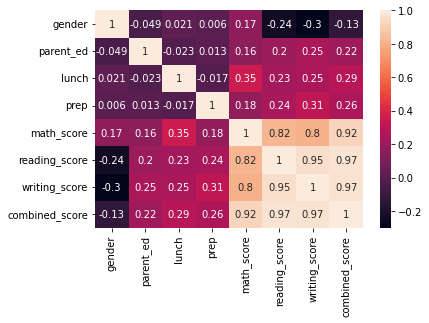

In [15]:
# Heatmap for preprocessed data
corr = df.corr()
sns.heatmap(corr, annot=True)

In [16]:
# creating different columns for different race
df = pd.concat([df, pd.get_dummies(df.race)], axis=1)
df.drop(["race"], axis=1, inplace=True)

In [17]:
df.head()

,gender,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score,group A,group B,group C,group D,group E
0,0.0,3.0,1.0,0.0,72,72,74,72,0,1,0,0,0
1,0.0,1.0,1.0,1.0,69,90,88,82,0,0,1,0,0
2,0.0,4.0,1.0,0.0,90,95,93,92,0,1,0,0,0
3,1.0,2.0,0.0,0.0,47,57,44,49,1,0,0,0,0
4,1.0,1.0,1.0,0.0,76,78,75,76,0,0,1,0,0


In [18]:
# Preparing data for Math Score
Y = df.math_score
X = df.loc[:,["gender", "parent_ed", "lunch", "prep", "group A", "group B", "group C", "group D", "group E"]]

In [19]:
X

,gender,parent_ed,lunch,prep,group A,group B,group C,group D,group E
0,0.0,3.0,1.0,0.0,0,1,0,0,0
1,0.0,1.0,1.0,1.0,0,0,1,0,0
2,0.0,4.0,1.0,0.0,0,1,0,0,0
3,1.0,2.0,0.0,0.0,1,0,0,0,0
4,1.0,1.0,1.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,0.0,4.0,1.0,1.0,0,0,0,0,1
996,1.0,0.0,0.0,0.0,0,0,1,0,0
997,0.0,0.0,0.0,1.0,0,0,1,0,0
998,0.0,1.0,1.0,1.0,0,0,0,1,0


In [20]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [22]:
# Implementation of Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
reg_math = LinearRegression()
reg_math.fit(X_train, y_train)
pred_math = reg_math.predict(X_test)
pred_math #  predicted values for combined_scor

array([75.38787101, 64.39492508, 74.65194518, 70.52192354, 70.43628972,
       65.50913719, 69.56766742, 63.09918852, 68.54859693, 53.06101147,
       50.69679424, 80.31502355, 61.25722717, 56.66262947, 69.56766742,
       70.99844798, 67.39682998, 61.25722717, 66.18437971, 70.12982568,
       73.34305299, 85.80433434, 65.50913719, 80.72005657, 75.05697821,
       56.83639704, 76.53963797, 64.67031285, 77.11843857, 78.83236379,
       56.66262947, 52.58448703, 61.73375161, 57.85546753, 62.93974529,
       69.56766742, 57.85546753, 66.18437971, 66.74653797, 64.49654528,
       63.34477832, 66.66090415, 74.77383356, 70.43628972, 75.44907607,
       76.944671  , 67.25286037, 76.53963797, 54.47217982, 74.21167529,
       75.05697821, 61.25722717, 61.73375161, 67.22306241, 53.06101147,
       69.95976528, 65.13085091, 73.56138329, 71.6736905 , 72.19128603,
       75.92560051, 78.98948902, 53.83449215, 64.65367051, 66.66090415,
       72.15021494, 75.23074578, 61.73375161, 68.73246892, 55.62

In [23]:
pred_math.mean() # Average prediction for combined_score

66.58457561588358

In [24]:
#Assessing goodness of fit through the mean of 10-fold cross validation, scoring R-squared and mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_math, X, Y, cv = 10, scoring = "r2").mean()*100

22.078984962040206

In [25]:
#Assessing goodness of fit through the mean of 10-fold cross validatio mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_math, X, Y, cv = 10, scoring = "neg_mean_squared_error").mean()

-175.0056466243804

In [26]:
#Accuracy of fit through the scoring R-squared
r2_score = reg_math.score(X_test,y_test)
print(f"Accuracy:", r2_score*100,'%')

Accuracy: 25.867529319277793 %


In [27]:
df.head()

,gender,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score,group A,group B,group C,group D,group E
0,0.0,3.0,1.0,0.0,72,72,74,72,0,1,0,0,0
1,0.0,1.0,1.0,1.0,69,90,88,82,0,0,1,0,0
2,0.0,4.0,1.0,0.0,90,95,93,92,0,1,0,0,0
3,1.0,2.0,0.0,0.0,47,57,44,49,1,0,0,0,0
4,1.0,1.0,1.0,0.0,76,78,75,76,0,0,1,0,0


In [28]:
Y = df.reading_score
X = df.loc[:,["gender", "parent_ed", "lunch", "prep", "group A", "group B", "group C", "group D", "group E"]]

In [29]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [30]:
# Implementation of Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
reg_read = LinearRegression()
reg_read.fit(X_train, y_train)
pred_read = reg_read.predict(X_test)
pred_read #  predicted values for combined_score

array([76.69140625, 68.41796875, 71.25      , 81.3125    , 64.90234375,
       79.0703125 , 63.94921875, 63.9375    , 69.51171875, 73.5       ,
       81.3125    , 82.44140625, 62.59765625, 64.90234375, 66.79296875,
       57.0234375 , 84.68359375, 67.734375  , 76.63671875, 73.48828125,
       67.55078125, 67.734375  , 66.57421875, 71.75      , 76.13671875,
       65.96875   , 71.56640625, 74.92578125, 66.17578125, 70.05078125,
       74.        , 62.609375  , 74.        , 65.5703125 , 69.328125  ,
       76.83203125, 72.2109375 , 64.34765625, 74.44921875, 68.81640625,
       67.08984375, 63.9375    , 55.28515625, 81.3125    , 67.74609375,
       77.1015625 , 80.6171875 , 71.06640625, 65.96875   , 59.0703125 ,
       55.28515625, 72.2890625 , 85.2890625 , 73.8984375 , 70.65625   ,
       60.421875  , 66.17578125, 66.17578125, 76.2265625 , 61.50390625,
       71.26171875, 73.29296875, 72.89453125, 78.5703125 , 73.29296875,
       67.80859375, 74.44921875, 71.75      , 76.83203125, 66.67

In [31]:
pred_read.mean() # Average prediction for combined_score

70.2301953125

In [32]:
#Accuracy of fit through the scoring R-squared
r2_score = reg_read.score(X_test,y_test)
print(f"Accuracy:", r2_score*100,'%')

Accuracy: 14.5028483378703 %


In [33]:
#Assessing goodness of fit through the mean of 10-fold cross validation, scoring R-squared and mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_read, X, Y, cv = 10, scoring = "r2").mean()*100

19.418743621027083

In [34]:
#Assessing goodness of fit through the mean of 10-fold cross validatio mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_read, X, Y, cv = 10, scoring = "neg_mean_squared_error").mean()

-167.74374709510445

In [35]:
df.head()

,gender,parent_ed,lunch,prep,math_score,reading_score,writing_score,combined_score,group A,group B,group C,group D,group E
0,0.0,3.0,1.0,0.0,72,72,74,72,0,1,0,0,0
1,0.0,1.0,1.0,1.0,69,90,88,82,0,0,1,0,0
2,0.0,4.0,1.0,0.0,90,95,93,92,0,1,0,0,0
3,1.0,2.0,0.0,0.0,47,57,44,49,1,0,0,0,0
4,1.0,1.0,1.0,0.0,76,78,75,76,0,0,1,0,0


In [36]:
Y = df.writing_score
X = df.loc[:,["gender", "parent_ed", "lunch", "prep", "group A", "group B", "group C", "group D", "group E"]]

In [37]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [38]:
# Implementation of Multivariate Linear Regression
from sklearn.linear_model import LinearRegression
reg_write = LinearRegression()
reg_write.fit(X_train, y_train)
pred_write = reg_write.predict(X_test)
pred_write #  predicted values for combined_score

array([70.07150785, 77.83582824, 58.42979032, 70.07150785, 66.73883354,
       52.96275111, 56.55994018, 66.10807612, 72.93369232, 69.8785282 ,
       75.21254044, 64.90759691, 72.65618212, 73.68712997, 82.27368338,
       78.28613762, 60.64103691, 55.54742539, 71.61535138, 81.12988903,
       55.82493558, 57.97183209, 70.8249455 , 72.91351185, 62.12053036,
       88.44659792, 62.04541245, 63.78223563, 57.52152271, 63.69620103,
       68.03787895, 68.49583718, 62.04541245, 85.58441345, 65.35790629,
       64.90759691, 58.42979032, 71.33784119, 72.65618212, 82.27368338,
       70.07150785, 61.29197479, 68.22009076, 81.24273553, 56.55994018,
       71.61535138, 68.22009076, 67.20932338, 74.3930053 , 85.86192364,
       70.8249455 , 77.74979364, 49.19229904, 58.8800997 , 64.90759691,
       76.54931444, 72.56176868, 70.07150785, 72.93369232, 83.75317683,
       58.68712005, 57.52152271, 58.8800997 , 70.44975404, 65.61347225,
       64.90759691, 66.30105577, 72.02542471, 66.30105577, 81.12

In [39]:
pred_write.mean() # Average prediction for combined_score

68.06871131844166

In [40]:
#Accuracy of fit through the scoring R-squared
r2_score = reg_write.score(X_test,y_test)
print(f"Accuracy:", r2_score*100,'%')

Accuracy: 36.53025116321976 %


In [41]:
#Assessing goodness of fit through the mean of 10-fold cross validation, scoring R-squared and mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_write, X, Y, cv = 10, scoring = "r2").mean()*100

30.65593708181232

In [42]:
#Assessing goodness of fit through the mean of 10-fold cross validatio mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_read, X, Y, cv = 10, scoring = "neg_mean_squared_error").mean()

-156.96276751811033

In [43]:
Y = df.combined_score
X = df.loc[:,["gender", "parent_ed", "lunch", "prep", "group A", "group B", "group C", "group D", "group E"]]

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [45]:

reg_comb = LinearRegression()
reg_comb.fit(X_train, y_train)
pred_comb = reg_comb.predict(X_test)
pred_comb #  predicted values for combined_score

array([67.25  , 77.5   , 78.8125, 65.875 , 70.6875, 53.5   , 58.9375,
       74.5   , 62.    , 65.875 , 71.5   , 63.25  , 66.3125, 67.375 ,
       74.5   , 62.75  , 66.875 , 59.875 , 70.6875, 61.6875, 65.6875,
       56.3125, 55.625 , 59.875 , 70.125 , 59.5   , 74.1875, 68.    ,
       70.6875, 56.1875, 80.1875, 68.5625, 58.375 , 75.375 , 54.1875,
       58.3125, 61.9375, 61.9375, 68.5625, 69.75  , 53.5   , 70.5625,
       73.9375, 58.3125, 71.875 , 60.5   , 74.8125, 72.5   , 61.3125,
       77.5   , 65.875 , 65.375 , 68.9375, 63.5625, 78.6875, 66.3125,
       71.625 , 70.6875, 54.125 , 73.3125, 66.5625, 76.    , 69.5   ,
       68.    , 82.    , 69.625 , 72.8125, 60.4375, 70.8125, 73.6875,
       66.25  , 65.8125, 74.9375, 67.    , 70.    , 61.6875, 67.3125,
       61.625 , 70.125 , 82.    , 66.8125, 59.5   , 70.625 , 77.    ,
       61.5625, 58.9375, 76.0625, 65.25  , 63.1875, 72.75  , 73.3125,
       68.5625, 77.5   , 66.875 , 70.    , 64.4375, 71.125 , 65.25  ,
       79.625 , 68. 

In [46]:
pred_comb.mean()

67.59

In [47]:
#Accuracy of fit through the scoring R-squared
r2_score = reg_write.score(X_test,y_test)
print(f"Accuracy:", r2_score*100,'%')

Accuracy: 19.443466204667715 %


In [48]:
#Assessing goodness of fit through the mean of 10-fold cross validation, scoring R-squared and mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_write, X, Y, cv = 10, scoring = "r2").mean()*100

20.86324343928684

In [49]:
#Assessing goodness of fit through the mean of 10-fold cross validatio mean-squared-error
from sklearn.model_selection import cross_val_score
cross_val_score(reg_read, X, Y, cv = 10, scoring = "neg_mean_squared_error").mean()

-157.2613423442785